In [23]:
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import sklearn
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [6]:
df = pd.read_csv('/content/adult_data_train (2).csv').drop(['education', 'marital-status'], axis = 1)
df

,age,workclass,fnlwgt,education-num,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,32,Private,37210,13,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
1,43,Private,101950,14,Exec-managerial,Not-in-family,White,Female,0,0,45,United-States,0
2,20,?,122244,9,?,Not-in-family,White,Female,0,0,28,United-States,0
3,40,Local-gov,24763,10,Transport-moving,Unmarried,White,Male,6849,0,40,United-States,0
4,24,Private,113936,13,Prof-specialty,Own-child,White,Male,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26043,35,Self-emp-not-inc,179171,9,Sales,Unmarried,Black,Female,0,0,38,Germany,0
26044,39,Private,421633,10,Protective-serv,Unmarried,Black,Female,0,0,30,United-States,0
26045,55,Private,82098,9,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,55,United-States,0
26046,26,Private,50053,13,Exec-managerial,Husband,White,Male,0,0,55,United-States,0


6


0.7591753685503686

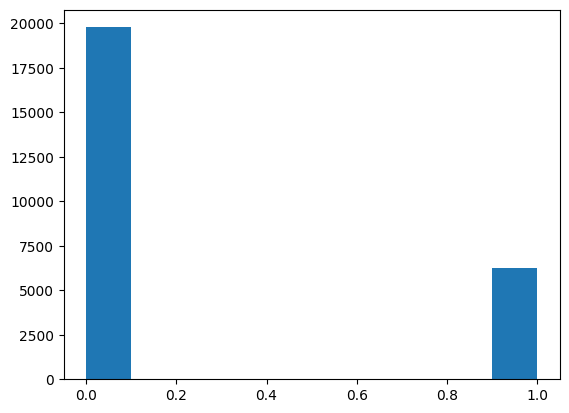

In [7]:
print(len(df.select_dtypes(exclude=['number']).columns)) # Количество нечисловых признаков
plt.hist(df['label'])
19775/(19775+6273) # Доля объектов класса 0

In [8]:
dfn = df.select_dtypes(include=['number'])
X = dfn.drop(['label'], axis = 1)
Y = dfn['label']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, stratify=df['label'], random_state = 23)
neight = KNeighborsClassifier().fit(x_train, y_train)
y_pred = neight.predict(x_test)
f1 = f1_score(y_test, y_pred)
f1

0.4016186140617097

In [20]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = DataFrame(scaler.transform(x_train), columns = x_train.columns)
x_test_scaled = scaler.transform(x_test)
x_train_scaled['fnlwgt'].mean()

0.12050241917487044

In [22]:
k = KNeighborsClassifier().fit(x_train_scaled, y_train)
y_pred = k.predict(x_test)
f1_score(y_test, y_pred)

0.535288725939505

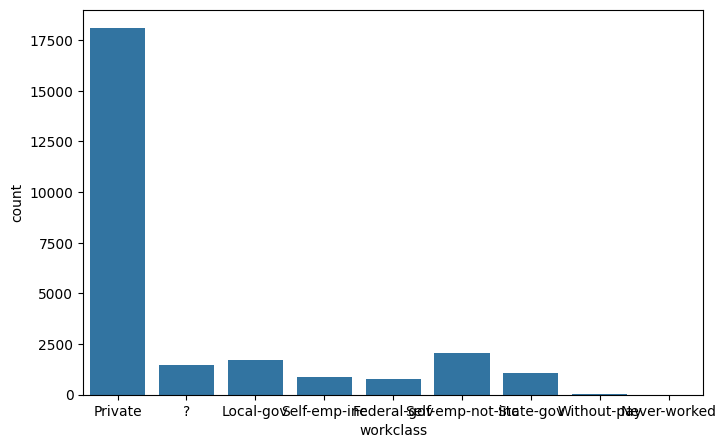

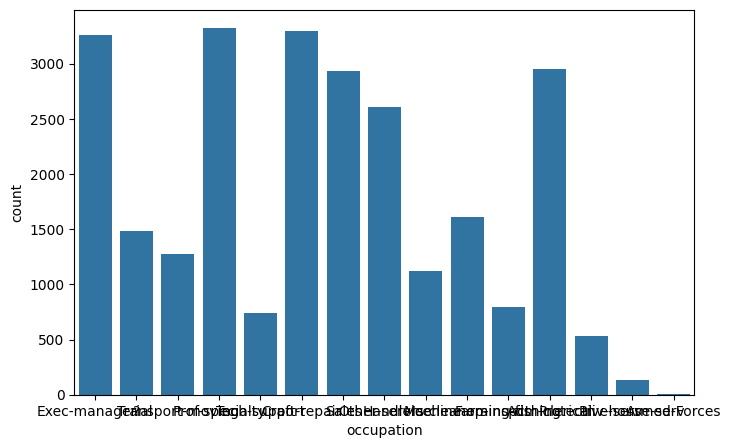

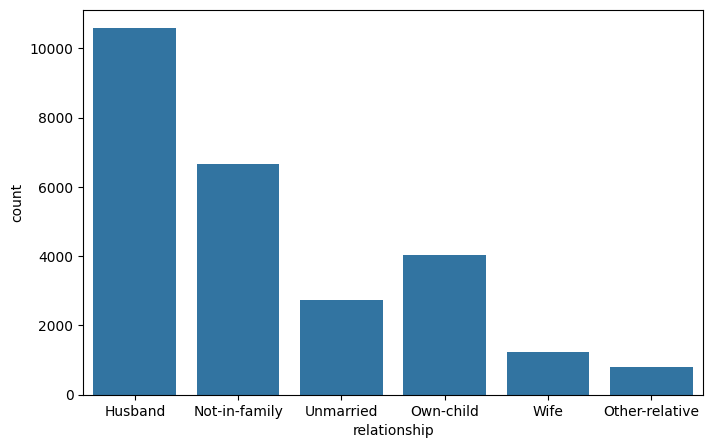

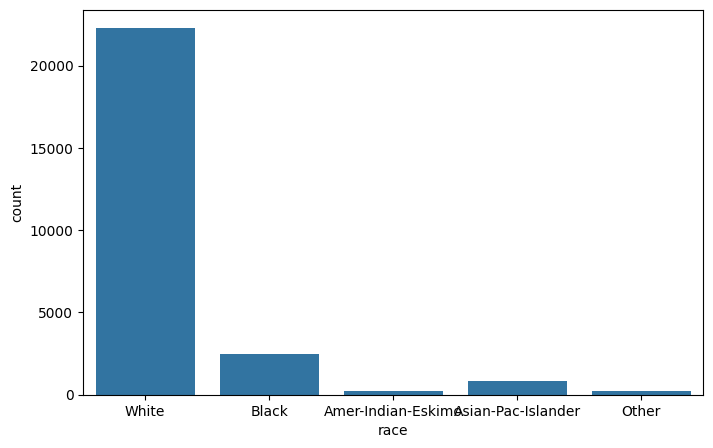

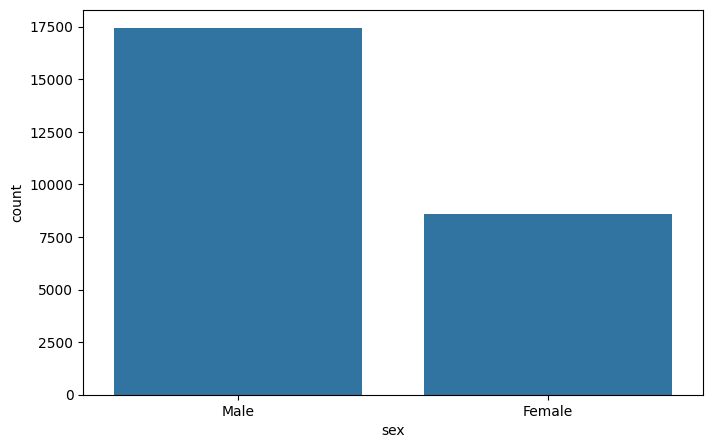

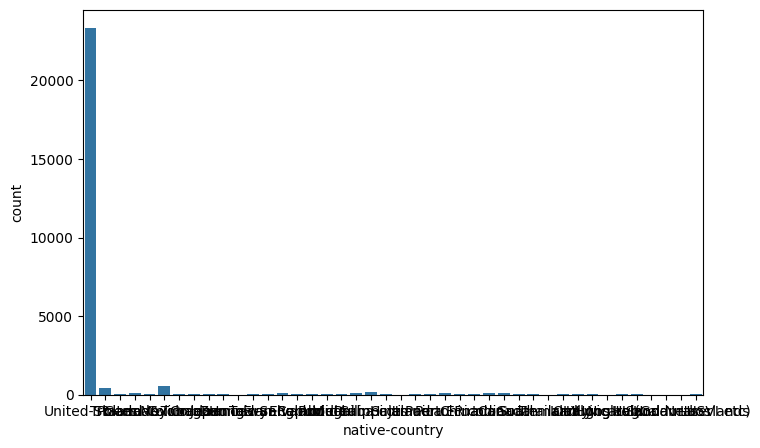

In [34]:
#df.select_dtypes(exclude=['number']).columns
for col in df.select_dtypes(exclude=['number']).columns:
  plt.figure(figsize=(8, 5))
  sns.countplot(df, x=col)
  plt.show


In [51]:
# Число строк с пропущенным значением
(df[:]=='?').any(axis=1).sum()

1914

In [65]:
dfn = df[~df.isin(['?']).any(axis=1)]
dfn = pd.get_dummies(dfn, drop_first = True)
dfn

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,label,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,32,37210,13,0,0,45,1,False,True,False,...,False,False,False,False,False,False,False,True,False,False
1,43,101950,14,0,0,45,0,False,True,False,...,False,False,False,False,False,False,False,True,False,False
3,40,24763,10,6849,0,40,0,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,24,113936,13,0,0,40,0,False,True,False,...,False,False,False,False,False,False,False,True,False,False
5,51,237630,9,7298,0,50,1,False,True,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26043,35,179171,9,0,0,38,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
26044,39,421633,10,0,0,30,0,False,True,False,...,False,False,False,False,False,False,False,True,False,False
26045,55,82098,9,0,0,55,0,False,True,False,...,False,False,False,False,False,False,False,True,False,False
26046,26,50053,13,0,0,55,0,False,True,False,...,False,False,False,False,False,False,False,True,False,False


In [72]:
X = dfn.drop(['label'], axis = 1)
Y = dfn['label']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 23, stratify = dfn['label'])

scale = MinMaxScaler()
scale.fit(x_train)
x_train = scale.transform(x_train)
x_test  = scale.transform(x_test)

k = KNeighborsClassifier().fit(x_train, y_train)
y_pred = k.predict(x_test)

round(f1_score(y_test, y_pred),3)


0.609

In [96]:
dfn = df.copy()
for j in range(dfn.shape[1]):
  modev = dfn.iloc[:, j].mode()[0]
  dfn.iloc[:,j].replace('?', modev, inplace = True)

dfn = pd.get_dummies(dfn, drop_first = True)
X = dfn.drop(['label'], axis = 1)
Y = dfn['label']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 23, stratify = dfn['label'])

scale = MinMaxScaler()
scale.fit(x_train)
x_train = scale.transform(x_train)
x_test  = scale.transform(x_test)

k = KNeighborsClassifier().fit(x_train, y_train)
y_pred = k.predict(x_test)

round(f1_score(y_test, y_pred),3)
dfn.to_csv('dfn_output.csv', index=False)



<ipython-input-96-ef98a28672c6>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfn.iloc[:,j].replace('?', modev, inplace = True)
<ipython-input-96-ef98a28672c6>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [98]:
df3 = pd.read_csv('/content/adult_data_reserved.csv')
df3

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,31,Self-emp-inc,117963,Doctorate,16,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States
1,20,?,201490,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States
2,78,Self-emp-inc,385242,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,9386,0,45,United-States
3,32,Private,164197,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,44,United-States
4,61,Private,92691,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,3,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6508,42,Self-emp-not-inc,32185,Bachelors,13,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,60,United-States
6509,34,Private,180714,Some-college,10,Married-civ-spouse,Transport-moving,Husband,Black,Male,0,2179,40,United-States
6510,39,Private,202027,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,United-States
6511,29,Private,125976,HS-grad,9,Separated,Sales,Unmarried,White,Female,0,0,35,United-States
